In [176]:
%reset -f

## Imports

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

## Load data

In [178]:
df_white = pd.read_csv('../data/winequality-white.csv', sep=';')
df_white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [179]:
df_red = pd.read_csv('../data/winequality-red.csv', sep=';')
df_red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [180]:
df = pd.concat([df_red, df_white])
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[6497 rows x 12 columns]

## Exploratory data analysis

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [182]:
df.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

In [183]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [184]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

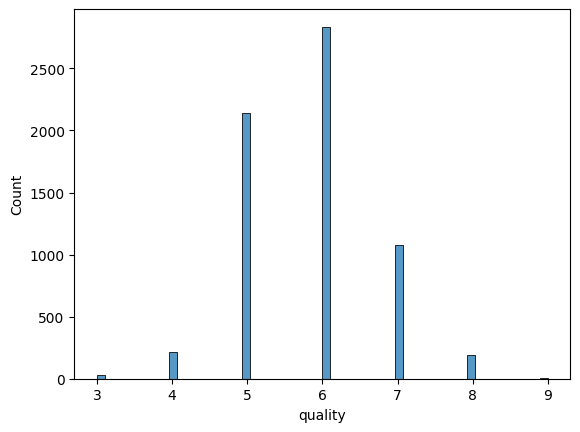

In [185]:
sns.histplot(df['quality']);

We can easily see that the target feature is not distributed in a balanced way. 

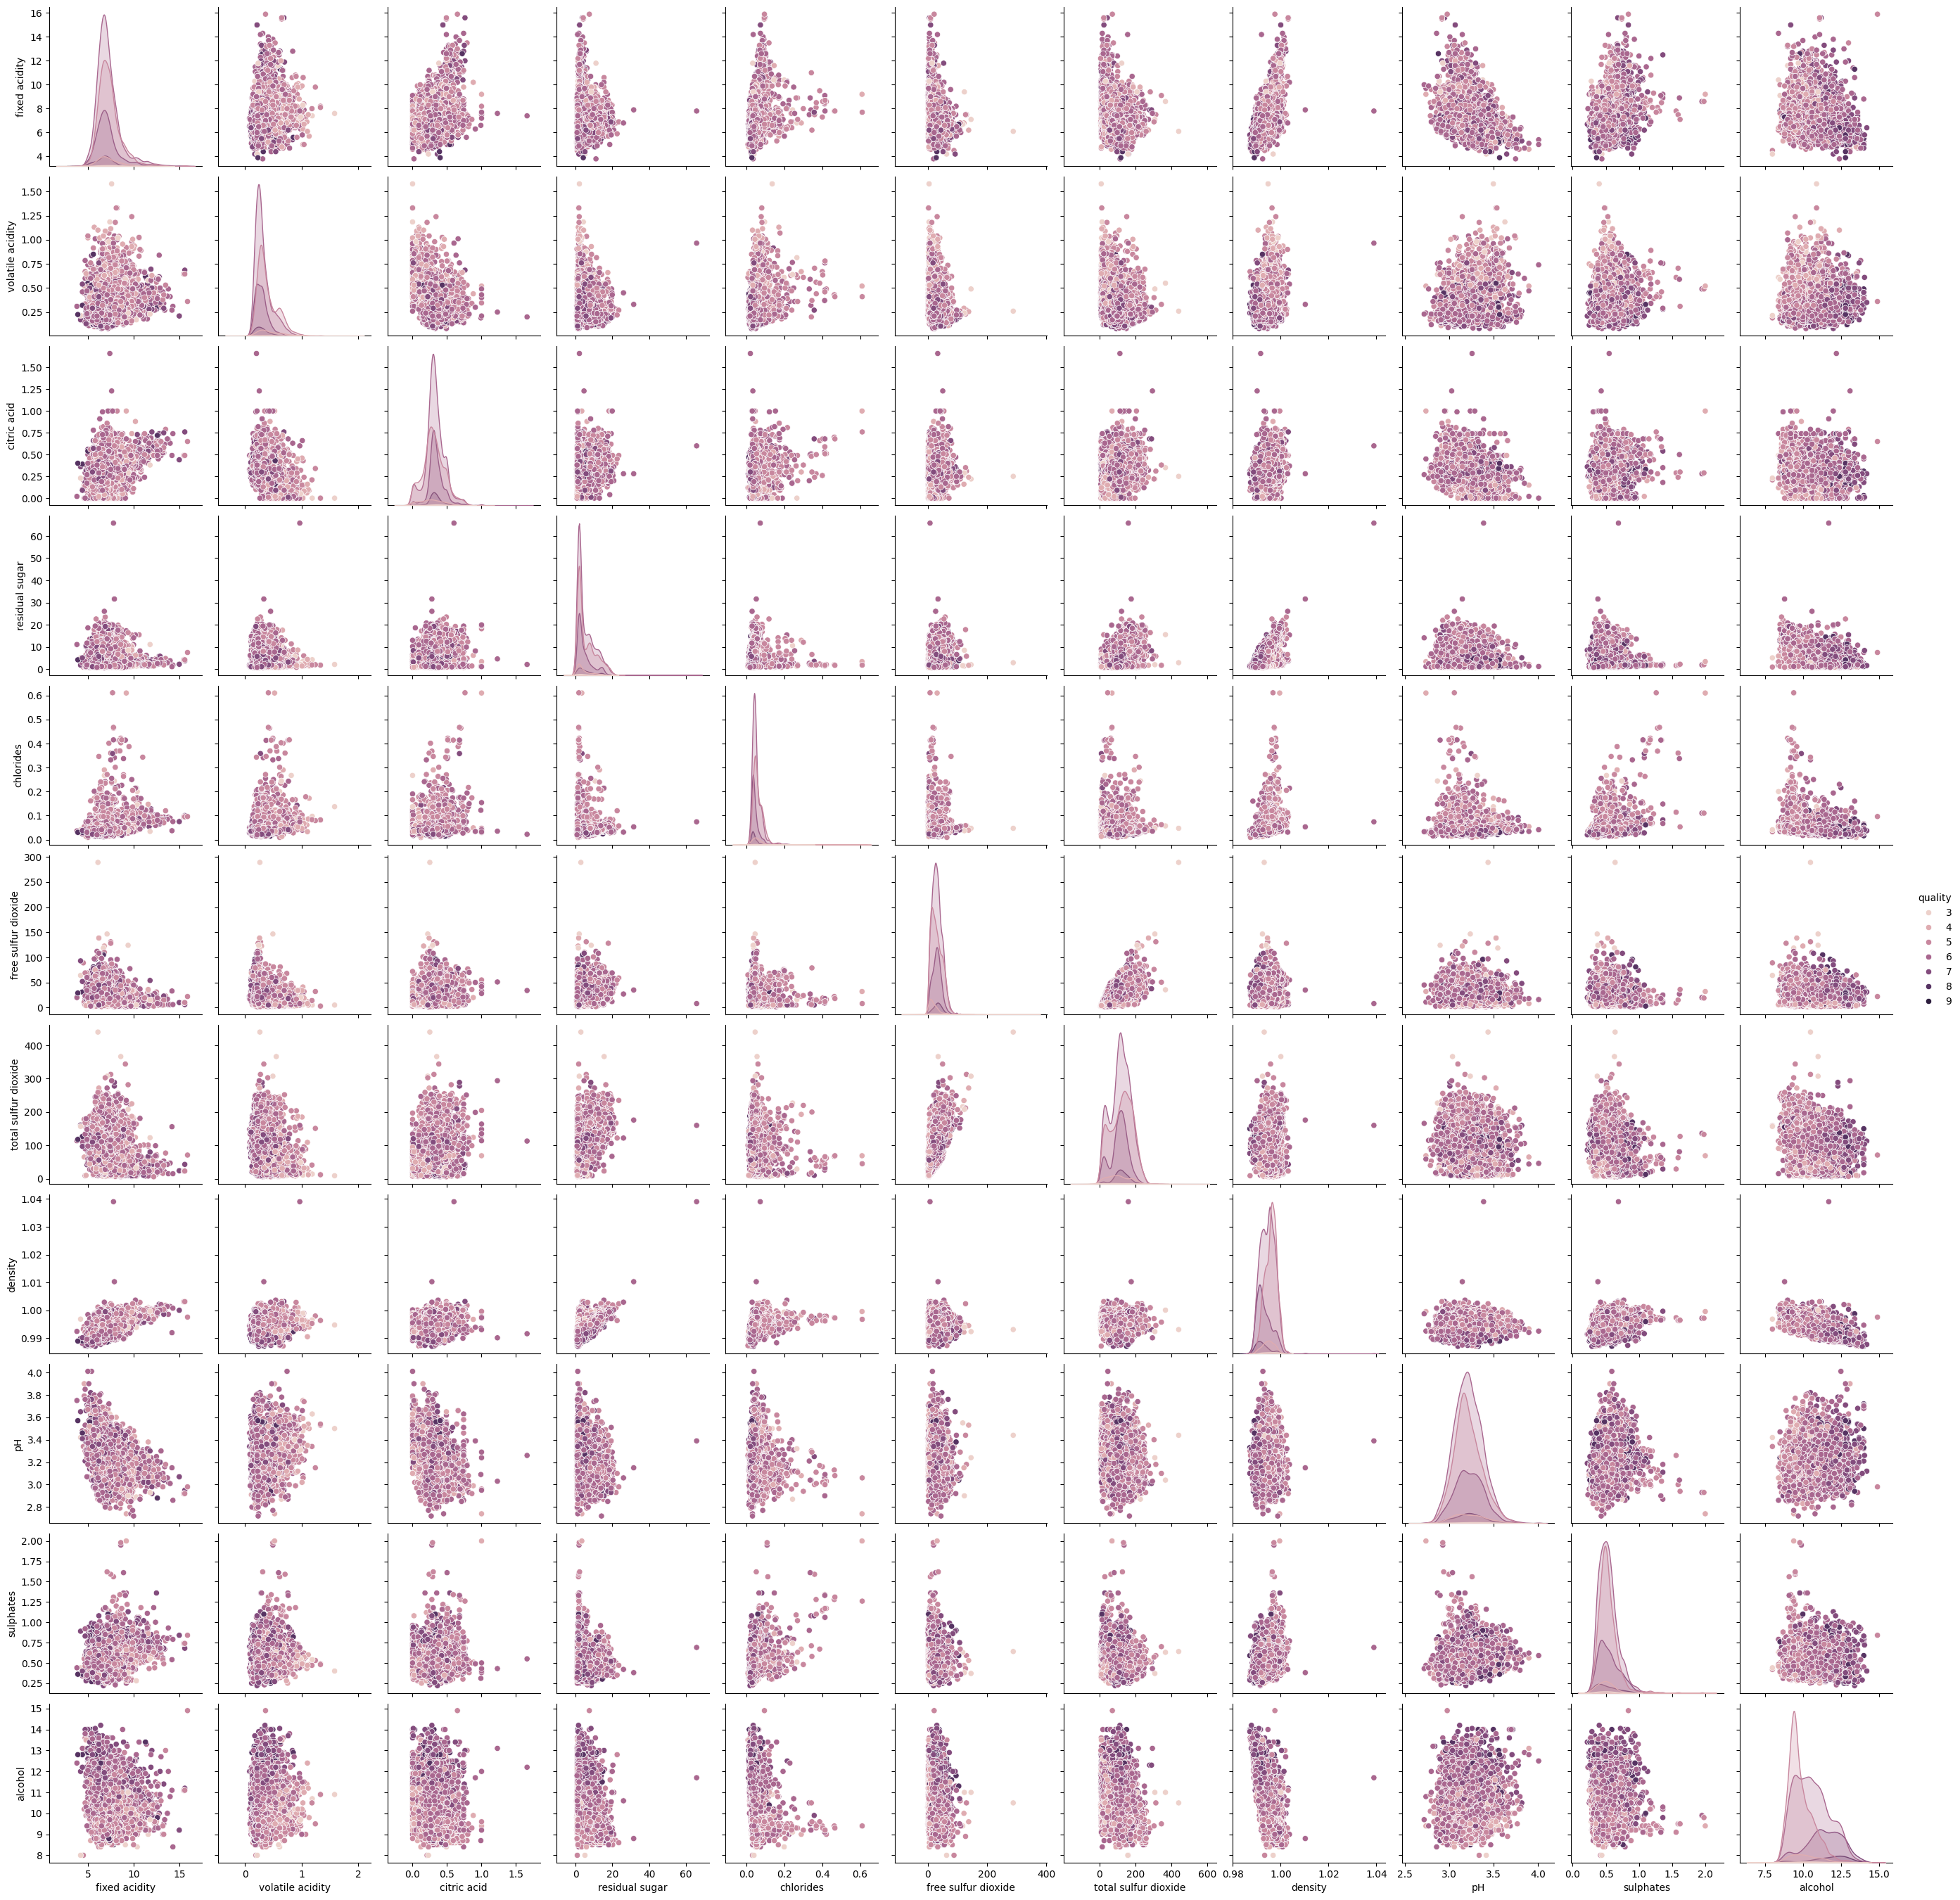

In [186]:
sns.pairplot(df, hue='quality')

* The above table is just too complex to look up to. There are too many features to be dispayed.
* That's why we will see which are the features that correlate the most with the target feature and we will plot only those.

In [187]:

df.corr()['quality'].apply(abs).sort_values(ascending=False).drop(['quality'])

alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

As we can see alcohol, volatile acidity, sulplates, citric acid correlate the most with quality.

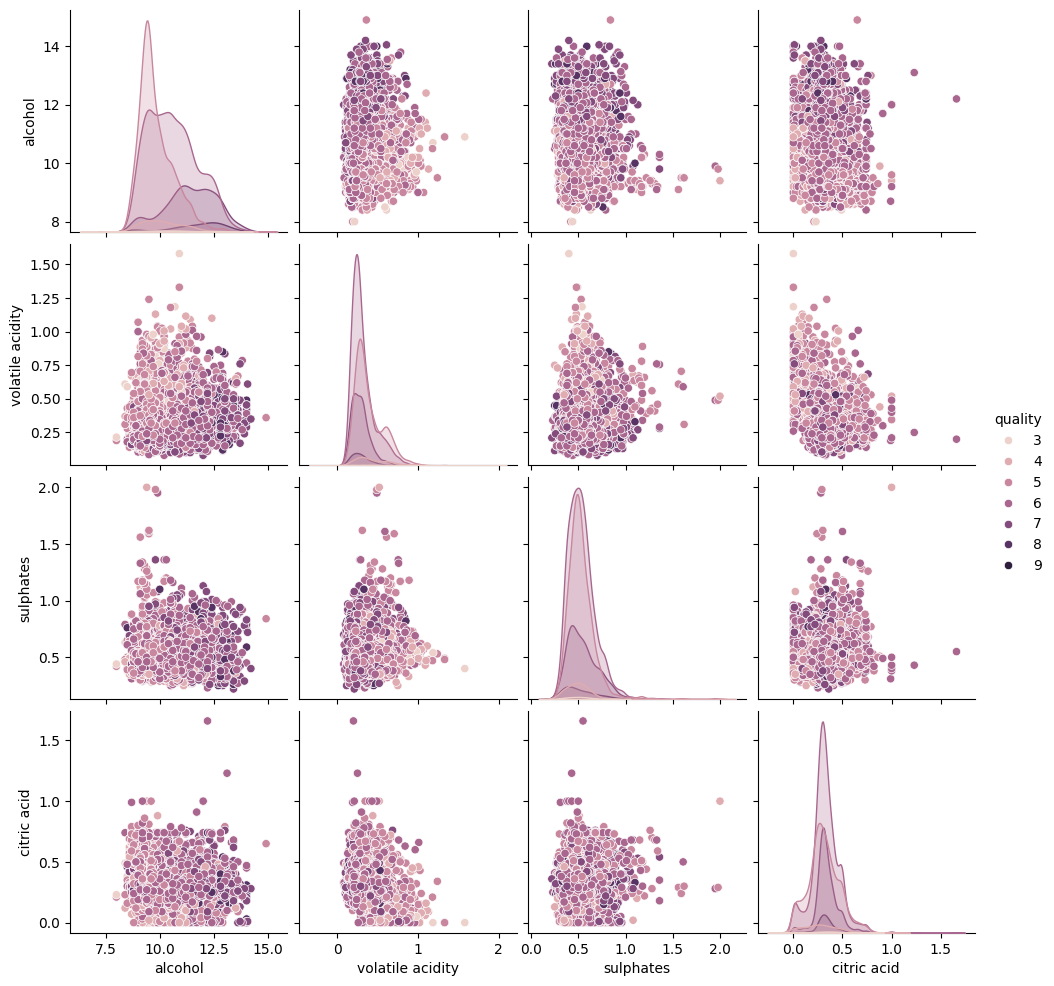

In [188]:
best_correlate = df[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']]
sns.pairplot(best_correlate, hue = 'quality')

* Higher alcohol and higher sulphates means better wine.
* Higher alcohol and less volatile acidity means better wine. 
* Other than that I can't see something that stands out in terms of correlation. Alcohol is obviously the best predictor.

## Prepare data

* We already saw that there are no null values and all of the values are good so there is no need for data cleaning

In [189]:
X = df.drop(columns=['quality'])
y = df['quality']

X:

In [190]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8  

[6497 rows x 11 columns]

y:

In [191]:
y

0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64

## Splitting the data

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Modelling

In [193]:
model_comparator = pd.DataFrame(columns = ['experiment', 'accuracy', 'precision', 'recall', 'f1-score'])
model_comparator

Empty DataFrame
Columns: [experiment, accuracy, precision, recall, f1-score]
Index: []

#### Random

In [194]:
predictions = np.random.randint(df['quality'].min(), df['quality'].max(), y_test.shape[0])
predictions, y_test.values

(array([4, 3, 7, ..., 8, 3, 3]), array([5, 4, 7, ..., 6, 7, 7]))

In [195]:
np.random.seed(42)
predictions = np.random.randint(df['quality'].min(), df['quality'].max(), y_test.shape[0])

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['random'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='macro', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='macro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator


/tmp/ipykernel_4649/2435991353.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_comparator = pd.concat([model_comparator, pd.DataFrame( {


experiment  accuracy  precision    recall  f1-score
0     random  0.158462   0.159311  0.115398  0.102167

#### Most frequent

In [196]:
predictions = np.full(y_test.shape[0], 5)

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['most_frequent'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='macro', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='macro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator

experiment  accuracy  precision    recall  f1-score
0         random  0.158462   0.159311  0.115398  0.102167
0  most_frequent  0.321538   0.321538  0.142857  0.069516

#### SVM

In [197]:
svc = SVC()
svc

SVC()

In [198]:
svc.fit(X_train, y_train)

SVC()

In [199]:
predictions = svc.predict(X_test)

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['SVC'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='macro', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='macro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator

experiment  accuracy  precision    recall  f1-score
0         random  0.158462   0.159311  0.115398  0.102167
0  most_frequent  0.321538   0.321538  0.142857  0.069516
0            SVC  0.431538   0.408463  0.145669  0.107612

#### Decision trees

In [200]:
dt = DecisionTreeClassifier(max_depth=3)
dt

DecisionTreeClassifier(max_depth=3)

In [201]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [202]:
predictions = dt.predict(X_test)

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['decision_tree'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='macro', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='macro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator

experiment  accuracy  precision    recall  f1-score
0         random  0.158462   0.159311  0.115398  0.102167
0  most_frequent  0.321538   0.321538  0.142857  0.069516
0            SVC  0.431538   0.408463  0.145669  0.107612
0  decision_tree  0.522308   0.502350  0.205602  0.194813

#### Random forest classifier

In [203]:
rf = RandomForestClassifier(n_estimators=100)
rf

RandomForestClassifier()

In [204]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
predictions = rf.predict(X_test)
predictions

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['random_forest'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='macro', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='macro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator


experiment  accuracy  precision    recall  f1-score
0         random  0.158462   0.159311  0.115398  0.102167
0  most_frequent  0.321538   0.321538  0.142857  0.069516
0            SVC  0.431538   0.408463  0.145669  0.107612
0  decision_tree  0.522308   0.502350  0.205602  0.194813
0  random_forest  0.683077   0.731449  0.361985  0.391902

#### Scaling data

In [206]:
scaler = StandardScaler()
scaler

StandardScaler()

In [207]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
752             7.6             0.540         0.13            2.50      0.097   
3556            4.8             0.210         0.21           10.20      0.037   
755             7.1             0.280         0.44            1.80      0.032   
351             9.1             0.795         0.00            2.60      0.096   
1332            7.9             0.160         0.64           17.00      0.050   
...             ...               ...          ...             ...        ...   
3573            7.8             0.310         0.40            1.60      0.027   
3401            8.8             0.190         0.30            5.00      0.028   
4254            7.5             0.290         0.24            9.90      0.058   
1279            9.8             0.300         0.39            1.70      0.062   
3430            7.1             0.170         0.40           14.55      0.047   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
752                  24.0                  66.0  0.99785  3.39       0.61   
3556                 17.0                 112.0  0.99324  3.66       0.48   
755                  32.0                 107.0  0.99070  3.25       0.48   
351                  11.0                  26.0  0.99940  3.35       0.83   
1332                 69.0                 210.0  1.00040  3.15       0.51   
...                   ...                   ...      ...   ...        ...   
3573                 20.0                  87.0  0.99110  3.15       0.48   
3401                 34.0                 120.0  0.99242  2.94       0.47   
4254                 25.0                 115.0  0.99567  3.15       0.46   
1279                  3.0                   9.0  0.99480  3.14       0.57   
3430                 47.0                 156.0  0.99945  3.34       0.78   

      alcohol  
752       9.4  
3556     12.2  
755      12.2  
351       9.4  
1332      9.3  
...       ...  
3573     11.9  
3401     11.2  
4254     10.9  
1279     11.5  
3430      9.1  

[5197 rows x 11 columns]

In [208]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.30320229,  1.23549564, -1.30239421, ...,  1.06396536,
         0.51718034, -0.91608782],
       [-1.86361751, -0.77834   , -0.7507776 , ...,  2.73729596,
        -0.35393285,  1.43517435],
       [-0.08372981, -0.35116274,  0.83512017, ...,  0.19631246,
        -0.35393285,  1.43517435],
       ...,
       [ 0.22581587, -0.29013742, -0.54392137, ..., -0.42343961,
        -0.48795026,  0.34351691],
       [ 2.00570356, -0.2291121 ,  0.49035979, ..., -0.48541482,
         0.24914552,  0.8473588 ],
       [-0.08372981, -1.02244129,  0.55931186, ...,  0.75408933,
         1.65632836, -1.16800877]])

In [209]:
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_test

array([[ 0.34769167,  1.8634727 , -1.89625387, ...,  1.14112848,
        -0.3749799 , -0.9130141 ],
       [ 0.50009803, -0.40723317,  0.01618215, ..., -1.06800847,
        -1.46445916,  1.00418919],
       [-0.26193378, -0.64625484,  0.08448344, ...,  0.2574737 ,
        -0.85162708,  1.75439917],
       ...,
       [-0.94776242, -0.04870067, -0.18872171, ...,  1.64607407,
         0.30594463,  0.17062254],
       [ 0.34769167,  1.38542936, -2.10115773, ...,  0.63618289,
         0.23785218,  0.00390921],
       [-0.26193378, -0.76576568,  0.01618215, ...,  0.76241929,
         0.10166727,  0.17062254]])

#### Logistic regression

In [210]:
lr = LogisticRegression(max_iter=1000)
lr

LogisticRegression(max_iter=1000)

We need max_iter to be more than 100, because the algorithm could not converge in 100 iterations.

In [211]:
lr.fit(scaled_X_train, y_train)

LogisticRegression(max_iter=1000)

In [212]:
predictions = lr.predict(X_test)

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['logistic_regression'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='macro', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='macro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator

/home/deyan/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


experiment  accuracy  precision    recall  f1-score
0               random  0.158462   0.159311  0.115398  0.102167
0        most_frequent  0.321538   0.321538  0.142857  0.069516
0                  SVC  0.431538   0.408463  0.145669  0.107612
0        decision_tree  0.522308   0.502350  0.205602  0.194813
0        random_forest  0.683077   0.731449  0.361985  0.391902
0  logistic_regression  0.028462   0.047317  0.091593  0.011218

#### KNN

In [213]:
knn = KNeighborsClassifier(n_neighbors=20)
knn

KNeighborsClassifier(n_neighbors=20)

In [214]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [215]:
predictions = knn.predict(scaled_X_test)

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['KNN'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='macro', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='macro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator

experiment  accuracy  precision    recall  f1-score
0               random  0.158462   0.159311  0.115398  0.102167
0        most_frequent  0.321538   0.321538  0.142857  0.069516
0                  SVC  0.431538   0.408463  0.145669  0.107612
0        decision_tree  0.522308   0.502350  0.205602  0.194813
0        random_forest  0.683077   0.731449  0.361985  0.391902
0  logistic_regression  0.028462   0.047317  0.091593  0.011218
0                  KNN  0.536154   0.515709  0.233959  0.231431

#### Conclusions
* Random forest performs the best.
* Logistic regression performs the worst - as it is predicting only 2 values - 4 and 9.